##Projet

In [1]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import Traitement as tr
import os
from Graph import Graph

In [2]:
#Lesture des données
data = pd.read_csv('data.csv', sep=';')
data.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,QGDP,TOT,PC_CHGPP,A,1962,5.696916,NaN
1,OECD,QGDP,TOT,PC_CHGPP,A,1963,5.175455,NaN
2,OECD,QGDP,TOT,PC_CHGPP,A,1964,6.361377,NaN
3,OECD,QGDP,TOT,PC_CHGPP,A,1965,5.364164,NaN
4,OECD,QGDP,TOT,PC_CHGPP,A,1966,5.733038,NaN


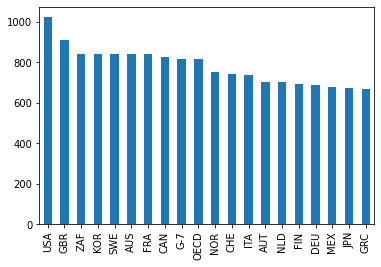

In [3]:
#Rapide visualisation pour voir qu'elle pays a le plus de data point
pays = pd.Series(data["LOCATION"].value_counts().head(20))
image = pays.plot(kind='bar')

Nous constatons qu'il n'y a pas le même nombre de data points par pays.
Dans un premier temps nous allons étudier les données de la France

In [4]:
#Jetons un coup d'yeux sur les données de la france
df_fra = data[data['LOCATION'] == "FRA"]
df_fra.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
5096,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q1,3.971438,E
5097,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q2,5.239927,E
5098,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q3,6.121195,E


In [5]:
#Nous étudions les variables du dataset
print(df_fra['FREQUENCY'].value_counts())
print(df_fra['MEASURE'].value_counts())
print(df_fra['SUBJECT'].value_counts())
print(df_fra['INDICATOR'].value_counts())

Q    721
A    119
Name: FREQUENCY, dtype: int64
IDX         302
PC_CHGPP    300
PC_CHGPY    238
Name: MEASURE, dtype: int64
TOT       538
VOLIDX    302
Name: SUBJECT, dtype: int64
QGDP    840
Name: INDICATOR, dtype: int64


MEASURE :
PC_CHGPP signifie pourcentage de variation période précédente, uniquement disponible pour TOT. \n
PC_CHGPY signifie pourcentage de variation même période année précédente, uniquement disponible pour TOT.
IDX indice, uniquement disponible pour SUBJECT = VOLIDX.


SUBJECT:

TOT signifie Total.
VOLIDX signifie indice de volume.

Lien d'un excel récapitulatif :
https://loicvieu-drive.mycozy.cloud/public?sharecode=JCVlMBO0XjQX


In [6]:
dataFR = data[data['LOCATION'] == 'FRA']
gpy, gpp, ind = tr.traitementParPays(dataFR, 'A')
tr.mobilMoy(gpp,4)

([[15077, '1963', 5.96657054325],
  [15078, '1964', 5.692903990874999],
  [15079, '1965', 5.405740593],
  [15080, '1966', 5.017551338624999],
  [15081, '1967', 5.011314242375],
  [15082, '1968', 5.3527141682499995],
  [15083, '1969', 5.428934231625],
  [15084, '1970', 5.46207980225],
  [15085, '1971', 5.2900890047499995],
  [15086, '1972', 4.768754227375],
  [15087, '1973', 3.808207064875],
  [15088, '1974', 3.152125409875],
  [15089, '1975', 2.850936273625],
  [15090, '1976', 2.603192686],
  [15091, '1977', 3.0732458905],
  [15092, '1978', 3.185790859625],
  [15093, '1979', 2.589721986125],
  [15094, '1980', 2.215522364125],
  [15095, '1981', 1.859829424875],
  [15096, '1982', 1.5958640578749999],
  [15097, '1983', 1.651335526],
  [15098, '1984', 1.699665691],
  [15099, '1985', 1.8438387925000002],
  [15100, '1986', 2.412642562125],
  [15101, '1987', 3.156361703375],
  [15102, '1988', 3.569693147375],
  [15103, '1989', 3.4537400084999996],
  [15104, '1990', 2.871617612875],
  [15105, 

In [7]:
g = Graph(data)

list_dates = g.get_list_dates(1961, 1980)#Dates pour lesquelles nous souhaitons afficher les données
df_fra_usa = g.filter_df(['FRA', 'USA'], 'Q', 'TOT', 'PC_CHGPY', list_dates)#Filtrage du df principal en fonction des éléments désirés

print(df_fra_usa.head(1))

g.line_graph(df_fra_usa, x='TIME', y='Value', x_label="Trimestre", y_label="Croissance du PIB (%)", title='Evolution du pib')#Création des courbes
g.display()

     LOCATION INDICATOR SUBJECT   MEASURE FREQUENCY     TIME     Value  \
5096      FRA      QGDP     TOT  PC_CHGPY         Q  1961-Q1  3.971438   

     Flag Codes  
5096          E  
